In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd
import numpy as np

df = pd.read_csv("data/NIST_Visc_data.csv")

feats = pd.DataFrame(df, columns=["MolFrac_1", "T"])
data = pd.DataFrame(df, columns=["MOL_1", "MOL_2", "Visc"])


feats.to_csv("data/features1.csv", index=False)
data.to_csv("data/data1.csv", index=False)

df = pd.read_csv("ManyProp/data/data.csv")

data_list = [] 
for idx, row in df.iterrows():
    smi1 = row['MOL_1']
    smi2 = row['MOL_2']
    mol1 = MoleculeModel(smi1, 0.5)()
    mol2 = MoleculeModel(smi2, 0.5)()
    target = row['logV']
    data_list.append((MixtureDataset([mol1, mol2], float(target))))

data_list = [ds.to_tuple() for ds in data_list]

In [1]:
from ManyProp.args import Args
from ManyProp.model.train import run_training
from ManyProp.data.data_pipeline import parse_data

In [3]:
args = Args()
args().epochs = 30
#args().num_folds = 2
#args().num_layers=2
#args().dropout=0.1
#args().data_points=40
#args().data_path="./data/data1.csv"
#args().features_path="./data/features1.csv"
#args().smiles_columns=['MOL_1', 'MOL_2']
#args().targets_column=['logV']
#args().mol_frac_columns=['MolFrac_1']
args().normalize = True
args().log = True

args().loss_function = "SmoothL1"

data = pd.read_csv(args().data_path)
feat_data = pd.read_csv(args().mol_features_path) 

all_data = pd.concat([data, feat_data], axis=1)
all_data.head()

data_list = parse_data(args=args,num_dp=100)

pd.DataFrame(data_list[:10]).head()

from ManyProp.utils import make_splits

train_data, val_data, test_data = make_splits(args=args, data_list=data_list)

dl = make_dl(args=args, data_list=data_list)
train_dl = make_dl(args=args, data_list=train_data)
val_dl = make_dl(args=args, data_list=val_data)
test_dl = make_dl(args=args, data_list=test_data)

In [4]:
import matplotlib.pyplot as plt

In [5]:
losses = run_training(args=args)#, train_dl=train_dl, val_dl=val_dl) 

[14:45:47] WARNING: not removing hydrogen atom without neighbors
[14:45:50] WARNING: not removing hydrogen atom without neighbors
[14:45:53] WARNING: not removing hydrogen atom without neighbors
[14:45:54] WARNING: not removing hydrogen atom without neighbors
[14:45:55] WARNING: not removing hydrogen atom without neighbors
[14:46:05] WARNING: not removing hydrogen atom without neighbors
[14:46:07] WARNING: not removing hydrogen atom without neighbors
[14:46:14] WARNING: not removing hydrogen atom without neighbors
[14:46:17] WARNING: not removing hydrogen atom without neighbors
[14:46:20] WARNING: not removing hydrogen atom without neighbors
[14:46:27] WARNING: not removing hydrogen atom without neighbors
[14:46:32] WARNING: not removing hydrogen atom without neighbors
[14:46:44] WARNING: not removing hydrogen atom without neighbors
[14:46:47] WARNING: not removing hydrogen atom without neighbors
[14:46:54] WARNING: not removing hydrogen atom without neighbors
[14:46:55] WARNING: not r

fold: 0


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\torch\nn\modules\loss.py:1042: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\torch\nn\modules\loss.py:1042: UserWarning: Using a target size (torch.Size([24])) that is different to the input size (torch.Size([24, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)


epoch: 0 train_loss: 0.007329919395892473 — val_loss: 0.01001443645301236
epoch: 1 train_loss: 0.006939551806405681 — val_loss: 0.009046165930942214
epoch: 2 train_loss: 0.006792035045329261 — val_loss: 0.01028595833273185
epoch: 3 train_loss: 0.006776785966547333 — val_loss: 0.009307170681373891
epoch: 4 train_loss: 0.006730657958104265 — val_loss: 0.011288474302298866
epoch: 5 train_loss: 0.006705990690835844 — val_loss: 0.009648461157035134
epoch: 6 train_loss: 0.006747768758250379 — val_loss: 0.010070103861566466
epoch: 7 train_loss: 0.006768366801654113 — val_loss: 0.011412576907563761
epoch: 8 train_loss: 0.006671520635840617 — val_loss: 0.009180363601105053
epoch: 9 train_loss: 0.006601630536873018 — val_loss: 0.01085845483583142
epoch: 10 train_loss: 0.006593379122785874 — val_loss: 0.010955790616366916
epoch: 11 train_loss: 0.006610803219901606 — val_loss: 0.010318426515426015
epoch: 12 train_loss: 0.006687891269932888 — val_loss: 0.008955889033759731
epoch: 13 train_loss: 0.0

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\torch\nn\modules\loss.py:1042: UserWarning: Using a target size (torch.Size([25])) that is different to the input size (torch.Size([25, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)


results: {'mse': 0.798053503036499, 'r2': 0.21933084726333618}, test_loss: 0.009985380237499326


[15:03:30] WARNING: not removing hydrogen atom without neighbors
[15:03:35] WARNING: not removing hydrogen atom without neighbors
[15:03:41] WARNING: not removing hydrogen atom without neighbors
[15:03:45] WARNING: not removing hydrogen atom without neighbors
[15:03:46] WARNING: not removing hydrogen atom without neighbors
[15:03:46] WARNING: not removing hydrogen atom without neighbors
[15:03:50] WARNING: not removing hydrogen atom without neighbors
[15:03:57] WARNING: not removing hydrogen atom without neighbors
[15:04:14] WARNING: not removing hydrogen atom without neighbors
[15:04:20] WARNING: not removing hydrogen atom without neighbors
[15:04:21] WARNING: not removing hydrogen atom without neighbors
[15:04:35] WARNING: not removing hydrogen atom without neighbors
[15:04:35] WARNING: not removing hydrogen atom without neighbors
[15:04:35] WARNING: not removing hydrogen atom without neighbors
[15:04:38] WARNING: not removing hydrogen atom without neighbors
[15:04:54] WARNING: not r

fold: 1


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\torch\nn\modules\loss.py:1042: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\torch\nn\modules\loss.py:1042: UserWarning: Using a target size (torch.Size([24])) that is different to the input size (torch.Size([24, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)


epoch: 0 train_loss: 0.007871586801131479 — val_loss: 0.009529835458432194
epoch: 1 train_loss: 0.006992840621566949 — val_loss: 0.009346069103914504
epoch: 2 train_loss: 0.006953626422892938 — val_loss: 0.01017836580136333
epoch: 3 train_loss: 0.006754349598312417 — val_loss: 0.009727718093332043
epoch: 4 train_loss: 0.0067226676705556595 — val_loss: 0.009282292575409372
epoch: 5 train_loss: 0.006719920453373773 — val_loss: 0.010618309347575322
epoch: 6 train_loss: 0.006718874912912618 — val_loss: 0.00946529197348767
epoch: 7 train_loss: 0.006769296594558732 — val_loss: 0.01054643917253469
epoch: 8 train_loss: 0.0067643110978318705 — val_loss: 0.009127037431252129
epoch: 9 train_loss: 0.006582261089529188 — val_loss: 0.010636956211294287
epoch: 10 train_loss: 0.006646450753890009 — val_loss: 0.00970606826743219
epoch: 11 train_loss: 0.0066685899273459595 — val_loss: 0.010323083140256645
epoch: 12 train_loss: 0.0065827703029798755 — val_loss: 0.010628186717700494
epoch: 13 train_loss: 

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\torch\nn\modules\loss.py:1042: UserWarning: Using a target size (torch.Size([25])) that is different to the input size (torch.Size([25, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)


results: {'mse': 0.7990881204605103, 'r2': 0.21134471893310547}, test_loss: 0.008817240317061319


[15:22:12] WARNING: not removing hydrogen atom without neighbors
[15:22:18] WARNING: not removing hydrogen atom without neighbors
[15:22:20] WARNING: not removing hydrogen atom without neighbors
[15:22:20] WARNING: not removing hydrogen atom without neighbors
[15:22:20] WARNING: not removing hydrogen atom without neighbors
[15:22:22] WARNING: not removing hydrogen atom without neighbors
[15:22:23] WARNING: not removing hydrogen atom without neighbors
[15:22:26] WARNING: not removing hydrogen atom without neighbors
[15:22:27] WARNING: not removing hydrogen atom without neighbors
[15:22:31] WARNING: not removing hydrogen atom without neighbors
[15:22:41] WARNING: not removing hydrogen atom without neighbors
[15:22:47] WARNING: not removing hydrogen atom without neighbors
[15:22:48] WARNING: not removing hydrogen atom without neighbors
[15:22:52] WARNING: not removing hydrogen atom without neighbors
[15:23:26] WARNING: not removing hydrogen atom without neighbors
[15:23:28] WARNING: not r

fold: 2


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\torch\nn\modules\loss.py:1042: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\torch\nn\modules\loss.py:1042: UserWarning: Using a target size (torch.Size([24])) that is different to the input size (torch.Size([24, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)


epoch: 0 train_loss: 0.007700330009251787 — val_loss: 0.008809665921099774
epoch: 1 train_loss: 0.007186476516959128 — val_loss: 0.009265450900796356
epoch: 2 train_loss: 0.006965496622077897 — val_loss: 0.0087568111921321
epoch: 3 train_loss: 0.006912402026151134 — val_loss: 0.011087403761158729
epoch: 4 train_loss: 0.0067891866503036035 — val_loss: 0.009307126424419512
epoch: 5 train_loss: 0.006812779638028491 — val_loss: 0.00944834984688639
epoch: 6 train_loss: 0.006931402123893112 — val_loss: 0.008276796898710994
epoch: 7 train_loss: 0.006925884085660903 — val_loss: 0.009466832366335375
epoch: 8 train_loss: 0.006751416716190815 — val_loss: 0.008998373825709805
epoch: 9 train_loss: 0.0068528940197799875 — val_loss: 0.008400494179818902
epoch: 10 train_loss: 0.006713700823065458 — val_loss: 0.0099780123282131
epoch: 11 train_loss: 0.00674320447566729 — val_loss: 0.009715071550665406
epoch: 12 train_loss: 0.006692300743241648 — val_loss: 0.01003060620401112
epoch: 13 train_loss: 0.006

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\torch\nn\modules\loss.py:1042: UserWarning: Using a target size (torch.Size([25])) that is different to the input size (torch.Size([25, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)


results: {'mse': 0.6960816383361816, 'r2': 0.25716525316238403}, test_loss: 0.00989999666345442


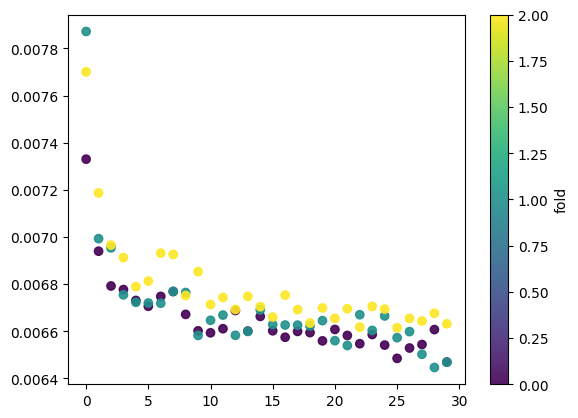

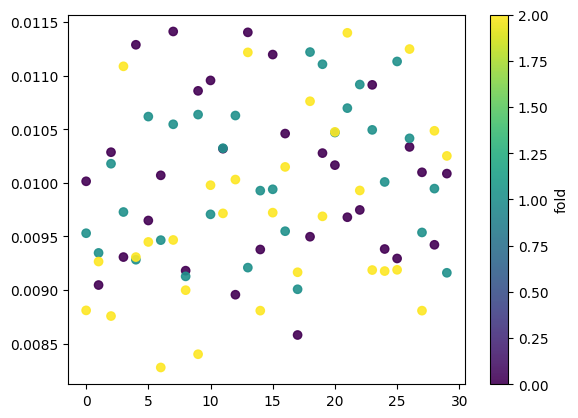

In [6]:
x = np.array([tup[1] for tup in losses])
y = np.array([tup[2] for tup in losses])

c = np.array([tup[0] for tup in losses])

plt.scatter(x, y, c=c, cmap='viridis', alpha=0.9)
plt.colorbar(label="fold")

plt.show()
y = np.array([tup[3] for tup in losses])
plt.scatter(x, y, c=c, cmap='viridis', alpha=0.9)
plt.colorbar(label="fold")

plt.show()

In [12]:
def make_plot(idx, losses_arr, title):
    fold_losses = []

    for n in range(args().num_folds):
        fold_losses.append([])
        for tup in losses_arr:
            if tup[0]==n:
                fold_losses[n].append(tup[idx])

    avg_losses = []
    avg_vars = []
    for e in range(args().epochs):
        losses_arr = []
        
        for f in fold_losses:
            losses_arr.append(f[e])
        avg_losses.append(np.mean(losses_arr).item())
        avg_vars.append(np.var(losses_arr).item())
    x=range(args().epochs)
    a, b = np.polyfit(x, avg_losses, 1)

    plt.errorbar(x=x,y=avg_losses, yerr=avg_vars, fmt='o', capsize=5)
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title(title)
    plt.plot(x, a*x+b)
    plt.show()

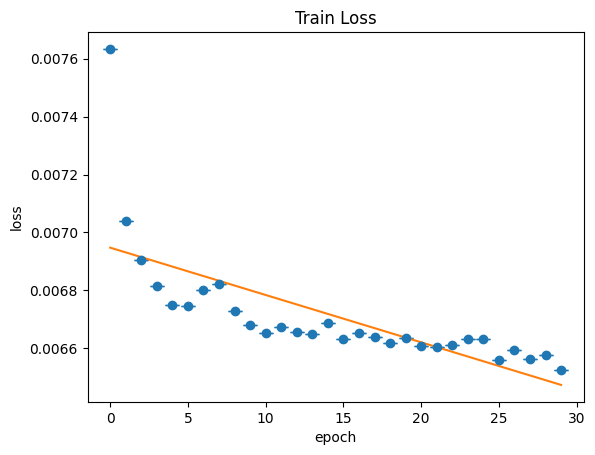

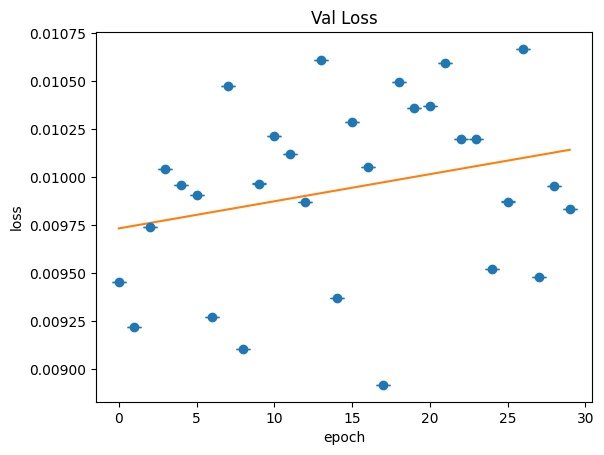

In [13]:
make_plot(2, losses_arr=losses, title="Train Loss")
make_plot(3, losses_arr=losses, title="Val Loss")

In [9]:
from ManyProp.data.testing import rand_mol


In [17]:
mol1 = rand_mol()
mol2 = rand_mol()

[08:29:29] Explicit valence for atom # 19 N, 4, is greater than permitted
[08:29:29] Can't kekulize mol.  Unkekulized atoms: 25 26 27
[08:29:29] SMILES Parse Error: syntax error while parsing: CC=(O)(=O)C=1CCCCC1c1ccccc1(N(O)=O)CC(O)c1ccccc1CC
[08:29:29] SMILES Parse Error: check for mistakes around position 4:
[08:29:29] CC=(O)(=O)C=1CCCCC1c1ccccc1(N(O)=O)CC(O)c
[08:29:29] ~~~^
[08:29:29] SMILES Parse Error: Failed parsing SMILES 'CC=(O)(=O)C=1CCCCC1c1ccccc1(N(O)=O)CC(O)c1ccccc1CC' for input: 'CC=(O)(=O)C=1CCCCC1c1ccccc1(N(O)=O)CC(O)c1ccccc1CC'
[08:29:29] Explicit valence for atom # 1 C, 5, is greater than permitted
[08:29:29] Explicit valence for atom # 3 N, 4, is greater than permitted
[08:29:29] SMILES Parse Error: syntax error while parsing: C(N(O)=O)C(CC)=(CCC)C=CCCC
[08:29:29] SMILES Parse Error: check for mistakes around position 16:
[08:29:29] C(N(O)=O)C(CC)=(CCC)C=CCCC
[08:29:29] ~~~~~~~~~~~~~~~^
[08:29:29] SMILES Parse Error: Failed parsing SMILES 'C(N(O)=O)C(CC)=(CCC)C=CCCC

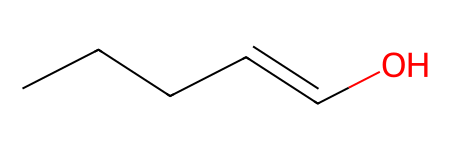

In [18]:
Chem.MolFromSmiles(mol1)

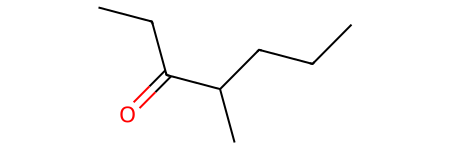

In [19]:
Chem.MolFromSmiles(mol2)

In [27]:
from ManyProp.model.predict import predict
#["COCCOC","CCCN"]
args().smiles = [mol1,mol2]
args().mol_fracs = [0.25, 0.75]
pred, var = predict(args=args)
print(f"prediction: {pred} - var: {var}")

model_loaded:  <All keys matched successfully>
model_loaded:  <All keys matched successfully>
model_loaded:  <All keys matched successfully>
prediction: 0.8471879230676305 - var: 0.006505434635026297


10**pred

model_loaded:  <All keys matched successfully>
model_loaded:  <All keys matched successfully>
model_loaded:  <All keys matched successfully>
model_loaded:  <All keys matched successfully>
model_loaded:  <All keys matched successfully>
model_loaded:  <All keys matched successfully>
model_loaded:  <All keys matched successfully>
model_loaded:  <All keys matched successfully>
model_loaded:  <All keys matched successfully>
model_loaded:  <All keys matched successfully>
model_loaded:  <All keys matched successfully>
model_loaded:  <All keys matched successfully>
model_loaded:  <All keys matched successfully>
model_loaded:  <All keys matched successfully>
model_loaded:  <All keys matched successfully>
model_loaded:  <All keys matched successfully>
model_loaded:  <All keys matched successfully>
model_loaded:  <All keys matched successfully>
model_loaded:  <All keys matched successfully>
model_loaded:  <All keys matched successfully>
model_loaded:  <All keys matched successfully>
model_loaded:

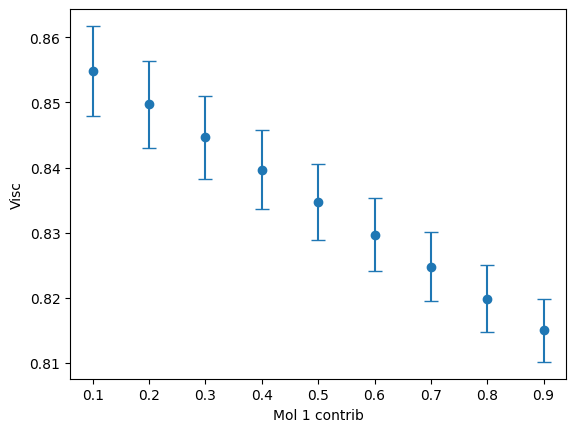

In [28]:
from ManyProp.model.predict import predict_graph
import matplotlib.pyplot as plt
fracs, predictions, vars = predict_graph(args)

plt.xlabel("Mol 1 contrib")
plt.ylabel("Visc")
plt.errorbar(x=fracs,y=predictions, yerr=vars, fmt='o', capsize=5)
plt.show()


0.10665317578241229 

0.9376093910024833
1.4904445287051609

In [ ]:
from ManyProp.args import Args
args = Args()
#args().data_points = 40
from ManyProp.model.train import lightning_train


lightning_train(args=args)


[10:34:16] WARNING: not removing hydrogen atom without neighbors
[10:34:25] WARNING: not removing hydrogen atom without neighbors
[10:34:31] WARNING: not removing hydrogen atom without neighbors
[10:34:33] WARNING: not removing hydrogen atom without neighbors
[10:34:40] WARNING: not removing hydrogen atom without neighbors
[10:34:43] WARNING: not removing hydrogen atom without neighbors
[10:34:43] WARNING: not removing hydrogen atom without neighbors
[10:34:49] WARNING: not removing hydrogen atom without neighbors
[10:34:57] WARNING: not removing hydrogen atom without neighbors
[10:35:07] WARNING: not removing hydrogen atom without neighbors
[10:35:10] WARNING: not removing hydrogen atom without neighbors
[10:35:11] WARNING: not removing hydrogen atom without neighbors
[10:35:16] WARNING: not removing hydrogen atom without neighbors
[10:35:26] WARNING: not removing hydrogen atom without neighbors
[10:35:29] WARNING: not removing hydrogen atom without neighbors
[10:35:41] WARNING: not r

fold: 0
                                                                           

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:476: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=27` in the `DataLoader` to improve performance.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 390. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an am

Epoch 0: 100%|██████████| 2726/2726 [00:27<00:00, 99.18it/s, v_num=18] 

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 369. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 407. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 356. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we 

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 394. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 372. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 425. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we 

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 360. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 405. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 411. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we 

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 401. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 437. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 456. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we 

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 370. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 412. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 428. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we 

Validation DataLoader 0:  35%|███▌      | 121/341 [00:01<00:02, 109.78it/s]

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 381. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 348. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 363. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we 

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 421. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 439. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 385. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we 

Validation DataLoader 0:  52%|█████▏    | 178/341 [00:01<00:01, 113.03it/s]

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 403. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 435. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 367. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we 

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 366. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 378. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 436. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we 

Validation DataLoader 0:  67%|██████▋   | 229/341 [00:02<00:00, 113.04it/s]


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 451. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 410. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 455. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we 

Validation DataLoader 0:  79%|███████▉  | 270/341 [00:02<00:00, 111.46it/s]

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 352. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 419. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 374. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 443. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 1:   0%|          | 1/2726 [00:00<00:41, 65.89it/s, v_num=18]   

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 362. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 444. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 291. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 1: 100%|██████████| 2726/2726 [00:28<00:00, 96.15it/s, v_num=18]

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 354. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 447. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 474. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 346. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 440. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 357. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 345. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 426. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 459. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 325. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 458. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 463. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 327. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 457. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 449. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 483. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 452. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 491. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 351. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we 

Epoch 2:   1%|          | 16/2726 [00:00<00:29, 92.83it/s, v_num=18]  

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 338. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 277. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 2: 100%|██████████| 2726/2726 [00:28<00:00, 97.05it/s, v_num=18]

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 468. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 464. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 335. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 328. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 472. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 495. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Validation DataLoader 0:  54%|█████▍    | 185/341 [00:01<00:01, 107.61it/s]

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 486. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 340. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 342. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 3:   1%|          | 15/2726 [00:00<00:32, 83.94it/s, v_num=18]  

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 302. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 3: 100%|██████████| 2726/2726 [00:30<00:00, 90.78it/s, v_num=18]

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 453. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 462. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 318. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 461. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 337. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 475. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 4:   0%|          | 8/2726 [00:00<00:34, 79.88it/s, v_num=18]   

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 442. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 297. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 4: 100%|██████████| 2726/2726 [00:29<00:00, 92.14it/s, v_num=18]

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 485. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 339. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Validation DataLoader 0:  45%|████▌     | 154/341 [00:01<00:01, 110.57it/s]

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 331. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 465. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Validation DataLoader 0:  62%|██████▏   | 210/341 [00:01<00:01, 110.29it/s]

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 332. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 6:   1%|          | 17/2726 [00:00<00:31, 85.75it/s, v_num=18]  

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 267. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 6: 100%|██████████| 2726/2726 [00:28<00:00, 96.79it/s, v_num=18]

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 321. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 333. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 467. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 466. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 7:   1%|          | 17/2726 [00:00<00:29, 92.14it/s, v_num=18]  

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 282. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 7: 100%|██████████| 2726/2726 [00:27<00:00, 99.15it/s, v_num=18] 

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 470. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 334. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 473. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 336. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 445. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 8:   1%|          | 17/2726 [00:00<00:30, 90.12it/s, v_num=18]  

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 305. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 8: 100%|██████████| 2726/2726 [00:26<00:00, 101.41it/s, v_num=18]

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 477. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 9:   1%|          | 27/2726 [00:00<00:17, 153.68it/s, v_num=18]  

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 471. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 9: 100%|██████████| 2726/2726 [00:26<00:00, 101.40it/s, v_num=18]

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 480. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 469. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Validation DataLoader 0:  39%|███▊      | 132/341 [00:01<00:01, 116.06it/s]

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 329. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 304. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 10: 100%|██████████| 2726/2726 [00:28<00:00, 96.06it/s, v_num=18]


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 324. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Validation DataLoader 0:  40%|████      | 138/341 [00:01<00:01, 111.03it/s]

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 323. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 11:   1%|          | 17/2726 [00:00<00:30, 90.06it/s, v_num=18]  

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 298. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 11: 100%|██████████| 2726/2726 [00:28<00:00, 96.48it/s, v_num=18]


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 478. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 12:   1%|          | 17/2726 [00:00<00:29, 90.98it/s, v_num=18]  t/s]

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 309. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 13:   1%|          | 16/2726 [00:00<00:30, 88.38it/s, v_num=18]  

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 310. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 14:   1%|          | 16/2726 [00:00<00:31, 87.09it/s, v_num=18]  

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 287. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 15:   1%|          | 14/2726 [00:00<00:35, 76.92it/s, v_num=18]  

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 288. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 15: 100%|██████████| 2726/2726 [00:31<00:00, 85.82it/s, v_num=18]

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 482. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 322. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 16:   0%|          | 13/2726 [00:00<00:35, 75.39it/s, v_num=18]  

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 314. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 17:   1%|          | 15/2726 [00:00<00:32, 83.02it/s, v_num=18]  

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 278. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 18: 100%|██████████| 2726/2726 [00:29<00:00, 91.16it/s, v_num=18]

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 493. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 19: 100%|██████████| 2726/2726 [00:27<00:00, 97.99it/s, v_num=18]

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 516. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 484. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 20:   1%|          | 18/2726 [00:00<00:28, 96.29it/s, v_num=18]  t/s]

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 286. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 21:   1%|          | 17/2726 [00:00<00:29, 92.50it/s, v_num=18]  

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 313. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 21: 100%|██████████| 2726/2726 [00:28<00:00, 94.97it/s, v_num=18]

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 479. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 22: 100%|██████████| 2726/2726 [00:28<00:00, 94.52it/s, v_num=18]

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 330. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 315. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 23:   1%|          | 16/2726 [00:00<00:31, 85.62it/s, v_num=18]  

c:\Users\cbh2\Documents\ManyProp\manypropenv\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 306. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 23:  21%|██        | 579/2726 [00:06<00:22, 96.50it/s, v_num=18]